# PROJET D'OPTIMISATION

In [ ]:
---
author: "Haeji Yun"
format: pdf
execute:
  echo: false
jupyter: python3
---

## Problème d'Optimisation

### Exercice 1

Log-vraisemblance : $J(\theta) = \frac{1}{n}\Sigma[(1-y_i)x_i^T\theta - log(1+e^{x_i^T\theta})]$

Fonction de coût = $f(\theta) = -J(\theta) = \frac{1}{n}\Sigma[log(1+e^{x_i^T\theta}) - (1-y_i)x_i^T\theta]$

**Dérivée**

$f'(\theta) = \frac{\partial f}{\partial \theta}$

$f'(\theta) = \frac{\partial}{\partial \theta} \frac{1}{n}\Sigma[log(1+e^{x_i^T\theta}) - (1-y_i)x_i^T\theta]$

$f'(\theta) = \frac{1}{n}\Sigma[\frac{\partial}{\partial \theta} log(1+e^{x_i^T\theta}) - \frac{\partial}{\partial \theta} (1-y_i)x_i^T\theta]$

$f'(\theta) = \frac{1}{n}\Sigma[\frac{x_i^Te^{x_i^T\theta}}{1+e^{x_i^T\theta}} - (1-y_i)x_i^T]$

$f'(\theta) = \frac{1}{n}\Sigma[\frac{e^{x_i^T\theta}}{1+e^{x_i^T\theta}} - (1-y_i)]x_i^T$

Or $\frac{e^{x_i^T\theta}}{1+e^{x_i^T\theta}} = 1-\frac{1}{1+e^{x_i^T\theta}}$

$f'(\theta) = \frac{1}{n}\Sigma[(1 - \frac{1}{1+e^{x_i^T\theta}}) - (1 -y_i)]x_i^T$

$f'(\theta) = \frac{1}{n}\Sigma[\frac{1}{1+e^{x_i^T\theta}} - y_i]x_i^T$

L'équation satasfaite pour les points stationnaires est : $0 = \frac{1}{n}\Sigma[\frac{1}{1+e^{x_i^T\theta}} - y_i]x_i^T$

On ne peut pas obtenir une formule explicite pour ces points. Il faudra donc utiliser la descente de gradient pour trouver les points optimum.

**Dérivée seconde**

$f''(\theta) = \frac{\partial^2 f}{\partial \theta}$

$f''(\theta) = \frac{\partial}{\partial \theta} \frac{1}{n}\Sigma[\frac{e^{x_i^T\theta}}{1+e^{x_i^T\theta}} - (1-y_i)]x_i^T$

$f''(\theta) = \frac{\partial}{\partial \theta} \frac{1}{n}\Sigma[\frac{e^{x_i^T\theta}}{1+e^{x_i^T\theta}}x_i^T - (1-y_i)x_i^T]$

$f''(\theta) = \frac{1}{n}\Sigma[\frac{\partial}{\partial \theta}\frac{e^{x_i^T\theta}}{1+e^{x_i^T\theta}}x_i^T - \frac{\partial}{\partial \theta} (1-y_i)x_i^T]$

$f''(\theta) = \frac{1}{n}\Sigma[\frac{x_i^Tx_i^Te^{x_i^T\theta}(1+e^{x_i^T\theta}) - x_i^Te^{x_i^T\theta}e^{x_i^T\theta}x_i^T}{(1+e^{x_i^T\theta})^2}]$

$f''(\theta) = \frac{1}{n}\Sigma[\frac{e^{x_i^T\theta}+e^{x_i^T\theta}e^{x_i^T\theta}  - e^{x_i^T\theta}e^{x_i^T\theta}}{(1+e^{x_i^T\theta})^2}]x_i^Tx_i$

$f''(\theta) = \frac{1}{n}\Sigma[\frac{e^{x_i^T\theta}}{(1+e^{x_i^T\theta})^2}]x_i^Tx_i$

**Convexité**

Dans notre matrice hésienne, Nous avons $e^{x_i^T\theta}>=0$ et $(1+e^{x_i^T\theta})^2 >= 0$ d'où  $\frac{e^{x_i^T\theta}}{(1+e^{x_i^T\theta})^2} >= 0$. L'exponentiel étant toujours positif, nous avons $f''(\theta)$ positive et notre fonction de coût est convexe.

## Application

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

wine = pd.read_csv('winequality-white.csv', sep = ';')

Nous allons utiliser la régression logistique en optimisant la fonction de coût $f(\theta)$ pour prédire la classe des vins blancs. 

Notre jeu de données contient 4898 observations qui correspondent aux vins évalués et 11 variables quantitatives qui décrivent les différents caractéristiques de chaque vin. Les vins sont notés entre 1 et 10. Nous allons assinger la classe 0 pour les vins qui ont une note inférieure à 5 et la classe 1 pour le reste.

Nous allons également normaliser les variables quantitatives pour les mettre à même échelle.

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [89]:
wine.loc[wine['quality']<5, 'quality'] = 0
wine.loc[wine['quality']>=5, 'quality'] = 1

X = wine.drop(columns = 'quality')
y = wine['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Exercice 2

**1. Algorithme de Descente de Gradient**

Nous allons implémenter l'algorithme de descente de gradient aux données. 

In [354]:
# Fonction d'initialisation
def initialisation(X):
    theta = np.ones(X.shape[1]+1)
    return theta

# Régression Logistique
def logistic(X_intercept, theta):
    X_theta = np.dot(X_intercept,theta)
    y_pred = 1/(1+np.exp(X_theta))
    return X_theta, y_pred


# Maximum de vraisemblance
def likelihood(X_theta, y) :
    mle = -np.sum((1-y)*X_theta - np.log(1+np.exp(X_theta)))/len(y)
    return mle


# Gradient descent 
def gradient(X_intercept, y, y_pred) :
    dl = np.dot(X_intercept.T, (y_pred - y))/len(y)
    #dl = np.dot(X_intercept.T, ((1-y_pred) - (1-y)))/len(y)
    return dl


# Mise à jour
def update(dl, theta, learning_rate):
    theta += learning_rate*dl
    return theta


# Algorithme
def optimisation_gd(X, y, learning_rate = 0.1, n_iteration = 300):
    X_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    theta = initialisation(X)
    
    l = []
    
    for i in range(n_iteration) : 
        X_theta, y_pred = logistic(X_intercept, theta)        
        l.append(likelihood(X_theta, y))
        dl = gradient(X_intercept, y, y_pred)
        theta = update(dl, theta, learning_rate)
  
    return l

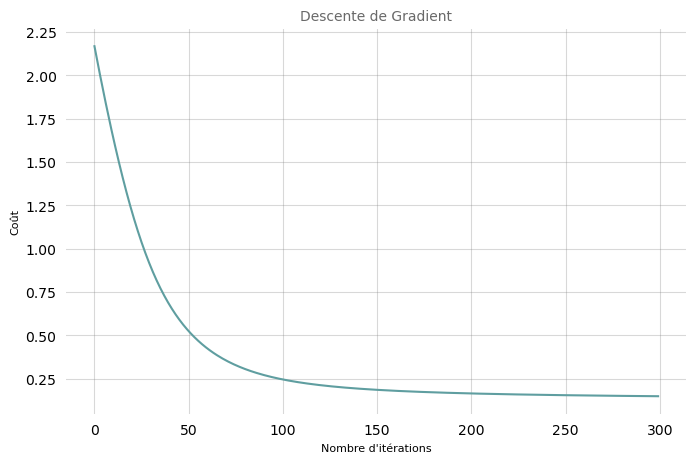

In [332]:
l_1 = optimisation_gd(X, y)

plt.figure(figsize = (8,5))
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_1, color = 'cadetblue')
plt.box(False)
#plt.legend(frameon=False)
plt.tick_params(bottom=False, left=False)
plt.title('Descente de Gradient', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itérations", size = 8)
plt.ylabel('Coût', size = 8);

**2. Critère d'arrêt**

Nous pouvons envisager la différence entre les gradients consécutifs $\nabla f(\theta_k+1) - \nabla f(\theta_k)$ comme le critère d'arrêt. Puisque les gradients deviennent petits lorsqu'on s'approche au point minimum, les écarts des graidents seront donc une bonne indication que nous sommes près du point minimum.

Nous pouvons également utiliser l'écart entre les valeurs consécutives de la fonction de coût $f(\theta_k+1) - f(\theta_k)$ mais il ne sera pas un criètre optimal lorsqu'il y a une région plate dans la fonction car nous pouvons être loins de point minimum même si le changement en valeur de coût est minime.

Nous optons d'utiliser le critère fondée sur les écarts entre gradients successifs :

 $crit_{\epsilon}(k) = \frac{||\nabla f(\theta_k+1) - \nabla f(\theta_k)||^2}{||\nabla f(\theta_k)||^2} < \epsilon, \epsilon > 0$ 

La gradient négatif diminue près des points stationnaires qui fait diminuer également l'écart entre gradients successifs. Pour cette raison ce critère traduit bien la proximité à un point optimum.

En normalisant par la norme de gradient entier $||\nabla f(\theta_k)||^2$, nous pouvons optimiser la vitesse de la descente. La magnitude du gradient diminue près de points stationnaires et la descente de gradient progresse lentement dans cette région. Avec la normalisation, nous pouvons réduire l'impact de la magnitude des gradients et renforcer la capacité de traverser plus facilement les régions plates de la fonction.

Nous allons ajouter le critère d'arrêt sur notre algorithme de descente de gradient.

In [313]:
def optimisation_gd_criteria(X, y, learning_rate = 0.1, n_iteration = 300, epsilon = 0.5):
    X_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    theta = initialisation(X)
    
    l = []
    iteration = 0
    norm =[]

    convergence = False
    
    for i in range(n_iteration):
        if not convergence :
            X_theta, y_pred = logistic(X_intercept, theta)        
            l.append(likelihood(X_theta, y))
            dl = gradient(X_intercept, y, y_pred)
            norm_gradient = np.linalg.norm(gradient(X_intercept, y, logistic(X_intercept, theta+dl)[1]) - dl)**2/np.linalg.norm(dl)**2
            norm.append(norm_gradient)
            if norm_gradient < epsilon :
                convergence = True
            theta = update(dl, theta, learning_rate)
            iteration += 1
    
    return l, iteration

Nous avons appliqué l'algorithme pour des valeurs différentes de $\epsilon$. Nous constatons que la vitesse de convergence augmente avec la valeur de $\epsilon$. Pour une petite valeur de $\epsilon$, nous avons besoins de plus d'itérations que pour une valeur de $\epsilon$ plus grande.

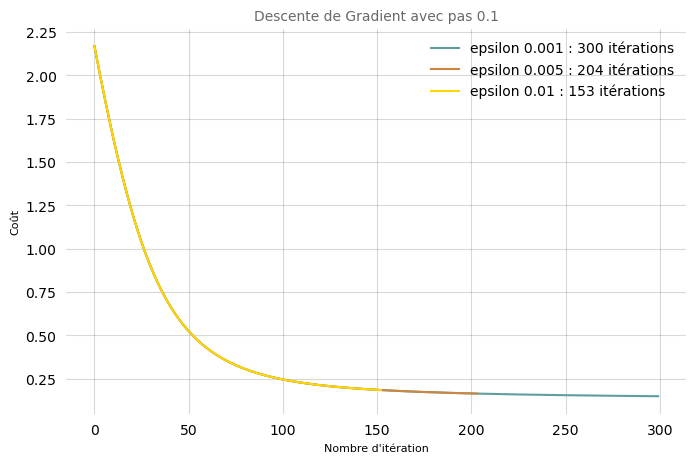

In [329]:
l_2, iteration_2 = optimisation_gd_criteria(X, y, epsilon = 0.001)
l_3, iteration_3 = optimisation_gd_criteria(X, y, epsilon = 0.005)
l_4, iteration_4 = optimisation_gd_criteria(X, y, epsilon = 0.010)

plt.figure(figsize = (8,5))
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_2, color = 'cadetblue', label = f'epsilon 0.001 : {iteration_2} itérations')
plt.plot(l_3, color = 'peru', label = f'epsilon 0.005 : {iteration_3} itérations')
plt.plot(l_4, color = 'gold', label = f'epsilon 0.01 : {iteration_4} itérations')
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'Descente de Gradient avec pas 0.1', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False)
plt.show()

**3. Calibration du pas de descente**

Nous allons appliquer la descente de gradients avec différentes valeurs de taux d'apprentissage $\eta$. Le taux contrôle la vitesse avec laquelle on s'approche au point optimum. Lorsque le pas est trop grand, on peut louper la solution optimale et lorsque le pas est trop petit, nous avons besoin de plus de temps pour atteindre le point minimum. 

Nous l'observons bien dans notre graphique. On a du mal à trouver le point optimum lorsque le taux d'apprentissage est élevé. Plus le taux est petit, plus d'itération est nécessaire pour arriver au point optimum.

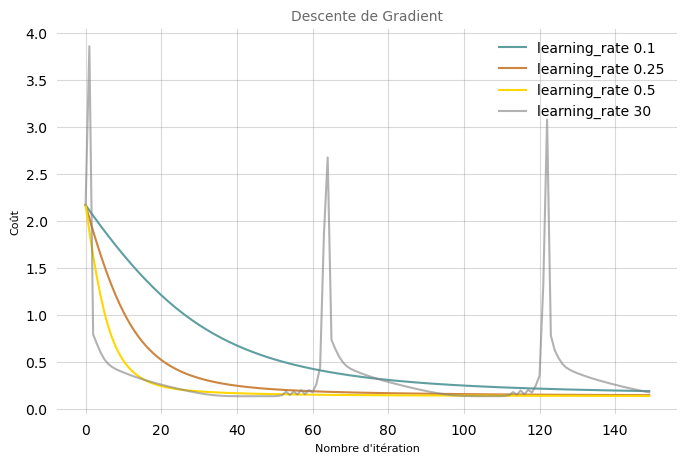

In [514]:
grid = [0.2, 0.3, 0.4, 0.5]

l_5 = optimisation_gd(X, y, learning_rate = 0.1, n_iteration = 150)
l_6 = optimisation_gd(X, y, learning_rate = 0.25, n_iteration = 150)
l_7 = optimisation_gd(X, y, learning_rate = 0.5, n_iteration = 150)
l_8 = optimisation_gd(X, y, learning_rate = 30, n_iteration = 150)

plt.figure(figsize = (8,5))
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_5, color = 'cadetblue', label = 'learning_rate 0.1')
plt.plot(l_6, color = 'peru', label = 'learning_rate 0.25')
plt.plot(l_7, color = 'gold', label = 'learning_rate 0.5')
plt.plot(l_8, color = 'gray', label = 'learning_rate 30', alpha = 0.6)
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'Descente de Gradient', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False, loc = 1)
plt.show();

**4. Cas fortement convexe**

Nous allons introduire la régularisation Ridge $\mu \|\theta\|^2$ dans notre fonction de coût. La régularisation permet de prévenir le surajustement du modèle et stabiliser l'estimation des paramètres lorsqu'il existe la multicolinéarité entre eux.

In [500]:
# Fonction de coût
def cost(X_theta, y, mu, theta) :
    ct = -np.sum((1-y)*X_theta - np.log(1+np.exp(X_theta)))/len(y) + mu*np.linalg.norm(theta)
    return ct


# Gradient descent 
def gradient_convex(X_intercept, y, y_pred, theta, mu) :
    dl = (np.dot(X_intercept.T, (y_pred - y)) + 2*theta*mu)/len(y)
    return dl


# Algorithme
def optimisation_gd_convex(X, y, learning_rate = 0.5, n_iteration = 100, mu = 0):
    X_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    theta = initialisation(X)
    
    l = []
    
    for i in range(n_iteration) : 
        X_theta, y_pred = logistic(X_intercept, theta)        
        l.append(cost(X_theta, y, mu, theta))
        dl = gradient_convex(X_intercept, y, y_pred, theta, mu)
        theta = update(dl, theta, learning_rate)
        
    return l

Nous observons pour les deux valeurs de $\mu$ que le coût est plus élevé que le cas précédant. C'est dû au fait qu'un biais est introduit avec la pénalité pour éviter le surapprentissage et améliorer la généralisation. 

Pour $\mu$ = 2, l'instabilité forte qui peut indiquer le pouvoir de pénalité est trop élevée. Pour les deux cas, l'instabilité augmente avec le taux d'apprentissage et donc l'algorithme est plus sensible au taux.

''

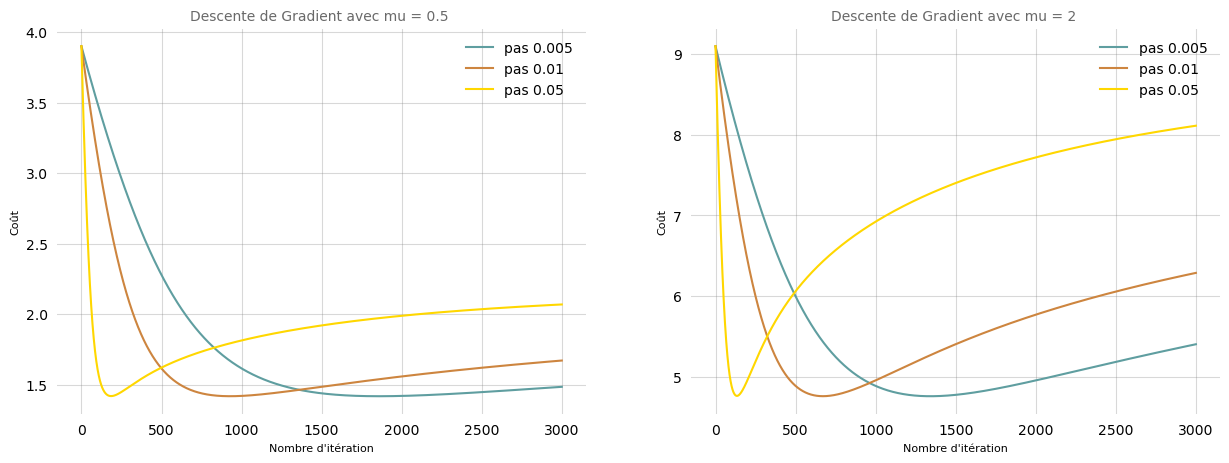

In [518]:
l_9 = optimisation_gd_convex(X, y, mu = 0.5, n_iteration = 3000, learning_rate = 0.005)
l_10 = optimisation_gd_convex(X, y, mu = 0.5, n_iteration = 3000, learning_rate = 0.01)
l_11 = optimisation_gd_convex(X, y, mu = 0.5, n_iteration = 3000, learning_rate = 0.05)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(l_9, color = 'cadetblue', label = 'pas 0.005')
plt.plot(l_10, color = 'peru', label = 'pas 0.01')
plt.plot(l_11, color = 'gold', label = 'pas 0.05')
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'Descente de Gradient avec mu = 0.5 ', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False)
;

l_12 = optimisation_gd_convex(X, y, mu = 2, n_iteration = 3000, learning_rate = 0.005)
l_13 = optimisation_gd_convex(X, y, mu = 2, n_iteration = 3000, learning_rate = 0.01)
l_14 = optimisation_gd_convex(X, y, mu = 2, n_iteration = 3000, learning_rate = 0.05)

plt.subplot(1,2,2)
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_12, color = 'cadetblue', label = 'pas 0.005')
plt.plot(l_13, color = 'peru', label = 'pas 0.01')
plt.plot(l_14, color = 'gold', label = 'pas 0.05')
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'Descente de Gradient avec mu = 2 ', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False)
; 

### Exercice 3 - Descente de Gradient Stochastique

**1. Algorithme SGD**

Nous allons implémenter la descente de gradient stochastique.

In [387]:
# Algorithme
def optimisation_sgd(X, y, learning_rate = 0.5, n_iteration = 50, replace = True, batch_size = 1):
    X_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    theta = initialisation(X)
    
    l = []
    
    X_theta, y_pred = logistic(X_intercept, theta)        
    l.append(likelihood(X_theta, y))
    dl = gradient(X_intercept, y, y_pred)
    theta = update(dl, theta, learning_rate)
    
    for i in range(n_iteration) : 
        j = np.random.choice(range(len(X)), size = batch_size, replace = replace)
        X_theta[j], y_pred[j] = logistic(X_intercept[j], theta)        
        l.append(likelihood(X_theta, y))
        dl = np.dot(X_intercept[j].T,(y_pred[j]-y[j]))
        theta = update(dl, theta, learning_rate)
        
    return l

Pour notre jeu de données, nous n'observons pas de différence apparente entre l'échantillonnage avec remise et l'échantillonnage sans remise. Il n'y a pas d'influence de stratégie d'échantillonnage sur la vitesse de convergence.

Puisque la mise à jour est effectuée après l'entraînement sur chaque observation, la descente présente des oscillations et du bruit. Chaque observation d'entrainement introduit une variabilité importante dans la mise à jour.

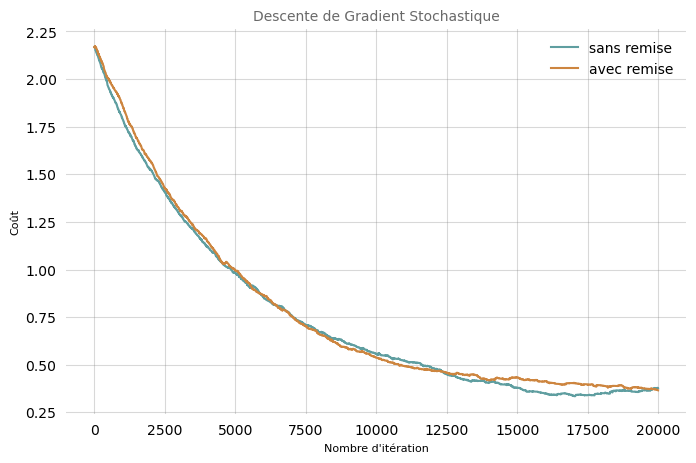

In [392]:
l_15 = optimisation_sgd(X, y, learning_rate = 0.5, n_iteration = 20000)
l_16 = optimisation_sgd(X, y, replace = False, learning_rate = 0.5, n_iteration = 20000)

plt.figure(figsize = (8,5))
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_15, color = 'cadetblue', label = 'sans remise')
plt.plot(l_16, color = 'peru', label = 'avec remise')
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'Descente de Gradient Stochastique', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False)
plt.show();

**2. GD vs SGD**

Nous observons que la descente de gradient stochastique a besoin beaucoup plus d'itération pour converger que la descente de gradient.

En effet, la mise à jour après l'entrainement sur chauqe observation de la descente de gradient stochastique introduit une variabilité importante et un bruit car chaque observation peut avoir une influence significative sur la mise à jour.

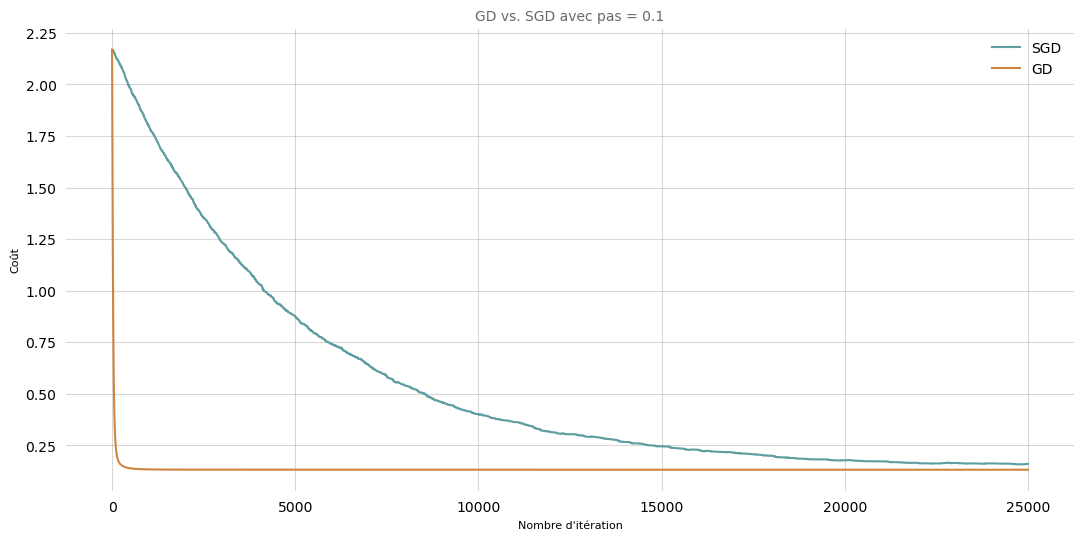

In [428]:
l_17 = optimisation_gd(X, y, learning_rate = 0.1, n_iteration = 25000)
l_18 = optimisation_sgd(X, y, learning_rate = 0.1, n_iteration = 25000)

plt.figure(figsize = (13,6))
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_17, color = 'cadetblue', label = 'SGD')
plt.plot(l_18, color = 'peru', label = 'GD')
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'GD vs. SGD avec pas = 0.1', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False)
plt.show();

**3. GD vs SGD Mini-Batch**

Nous observons que la descente gradient stochastique mini-batch converge beaucoup plus rapidement que la descente gradient stochastique pure. Elle converge presque rapidement que la descente gradient.

Le fait d'utiliser les mini-lots de données permet de réduire le bruit en calculant la moyenne sur plusieurs observations et de stabiliser les mises à jour. Le mini-batch présente un équilibre entre la vitesse de convergence et la stabilisation.

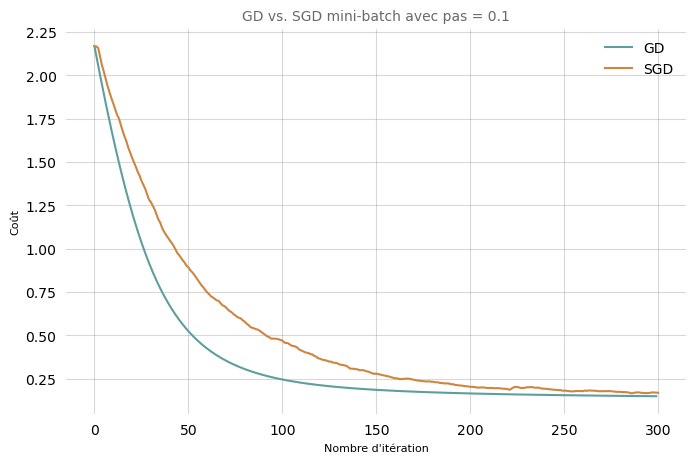

In [429]:
l_19 = optimisation_sgd(X, y, replace = False, learning_rate = 0.1, batch_size = 100, n_iteration = 300)
l_20 = optimisation_gd(X, y, learning_rate = 0.1, n_iteration = 300)

plt.figure(figsize = (8,5))
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.plot(l_19, color = 'cadetblue', label = 'GD')
plt.plot(l_20, color = 'peru', label = 'SGD')
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title(f'GD vs. SGD mini-batch avec pas = 0.1', color ='dimgray', size = 10)
plt.xlabel("Nombre d'itération", size = 8)
plt.ylabel('Coût', size = 8)
plt.legend(frameon=False)
plt.show();

### Conclusion

Nous avons exploré divers aspects des techniques d'optmisation basées sur le gradient en nous concentrant sur la régression logistique comme modèle sous-jacent.

Les hyperparamètres tels que le taux d'apprentissage, le critère d'arrêt, le nombre d'itération, le coefficient de pénalité Ridge jouent un rôle crucial dans la recherche de la configuration optimale.

Lorsque le jeu de données est volumineux, l'utilisation de SGD avec des hyperparamètres bien ajustés offre l'avantage de réduire les coûts de calcul tout en préservant la vitesse de convergence et la stabilité de l'algorithme.

Dans notre étude, l'entraînement a été réalisé sur les données entières.  L'utilisation de données validation et de test en plus nous permettrait d'améliorer la généralisation du modèle en évaluant sa performance sur des données non vues pendant l'entraînement.